# Projet SHS

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and cleaning

In [2]:
num_subjects = pd.read_csv('data/results.csv')
results = pd.read_csv('data/results.csv')
results

,Unnamed: 0.1,sujet1,A,A.1,sujet2,A.2,B,sujet3,B.1,B.2,...,B.33,sujet 33,B.34,A.30,sujet 34,A.31,A.32,sujet 35,A.33,A.34
0,NaN,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,...,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage
1,Ampoule,11,NaN,NaN,8,5,3,3,NaN,NaN,...,NaN,20,1,1,10,NaN,NaN,4,NaN,NaN
2,Ananas,18,13,5,16,NaN,NaN,1,1,1,...,9,11,NaN,11,2,10,6,2,5,8
3,Bottes,2,2,11,2,10,NaN,11,NaN,NaN,...,4,14,NaN,NaN,15,8,5,18,NaN,NaN
4,Bouteille,20,8,12,13,NaN,NaN,14,NaN,NaN,...,NaN,2,NaN,NaN,7,NaN,NaN,15,NaN,NaN
5,Briquet,4,NaN,NaN,4,NaN,NaN,8,NaN,NaN,...,NaN,6,10,8,16,NaN,11,9,NaN,NaN
6,Calculatrice,19,9,8,18,NaN,NaN,6,NaN,NaN,...,2,13,NaN,NaN,3,NaN,NaN,12,NaN,NaN
7,Camion,15,7,7,7,2,4,17,4,5,...,NaN,8,8,3,11,9,7,13,10,3
8,Ciseaux,1,1,1,15,NaN,NaN,10,NaN,NaN,...,5,19,2,NaN,5,6,NaN,16,9,7
9,Classeur,7,11,3,11,7,8,4,NaN,NaN,...,6,10,12,4,4,2,2,8,8,1


## Idées analyses

### 1. Regarder à quel points ils se rappellent des mêmes objets pendant les deux phases de rappel

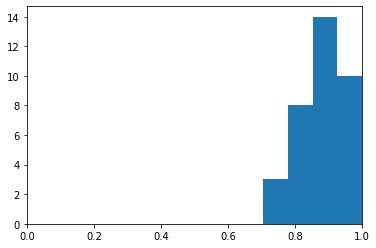

In [3]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first.index = items
    second.index = items
    
    first = set(first[~first.isnull()].index)
    second = set(second[~second.isnull()].index)
    
    score = len(second - first)/len(second)
    scores.append(score)
    
    # Skip apparition
    next(gen, None)
    
plt.hist(1 - np.array(scores), bins=4)
plt.xlim((0, 1))
plt.show()

### 2. Regarder s'ils se rappellent d'autant d'objets les deux fois

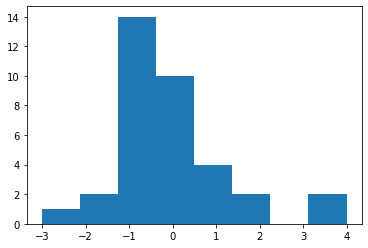

In [4]:
gen = results.T.iterrows()

next(gen)
next(gen)

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first = len(first[~first.isnull()])
    second = len(second[~second.isnull()])
    
    if second-first==-9:
        print(i)
    
    scores.append(second - first)
    
    # Skip apparition
    next(gen, None)
    
    
plt.hist(scores, bins=np.max(scores)-np.min(scores)+1)
plt.show()

### 3. Regarder si l'ordre de rappel et d'appartition sont similaires (l'endroit, l'envers, ...) - entre l'apparaition et le premier rappel, apparition et deuxième rappel, premier rappel et deuxième rappel

In [5]:
# https://stackoverflow.com/questions/24547641/python-length-of-longest-common-subsequence-of-lists
def lcs_length(a, b):
    table = [[0] * (len(b) + 1) for _ in range(len(a) + 1)]
    for i, ca in enumerate(a, 1):
        for j, cb in enumerate(b, 1):
            table[i][j] = (
                table[i - 1][j - 1] + 1 if ca == cb else
                max(table[i][j - 1], table[i - 1][j]))
    return table[-1][-1]

In [6]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first.index = items
    second.index = items
    
    first = first[~first.isnull()].astype(int)
    first.sort_values(inplace=True)
    first = list(first.index)
    
    second = second[~second.isnull()].astype(int)
    second.sort_values(inplace=True)
    second = list(second.index)
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    scores.append(score)
    
    # Skip apparition
    next(gen, None)

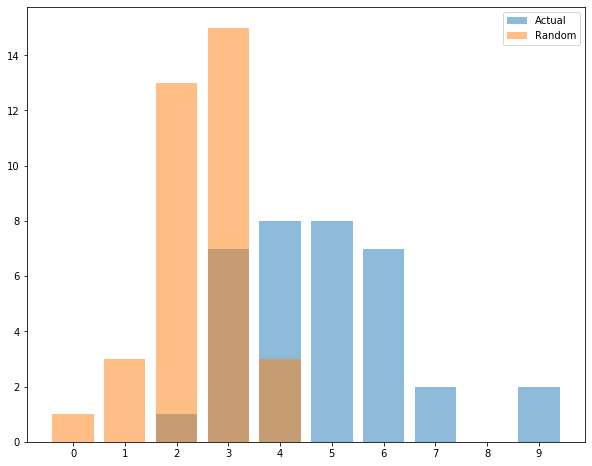

In [7]:
np.random.seed(1)
sizes = [9, 10, 11, 12, 13]
items = results.loc[1:, results.columns[0]]

scores_random = []

for _ in range(len(scores)):
    first = np.random.choice(items.values, size=np.random.choice(sizes))
    second = np.random.choice(items.values, size=np.random.choice(sizes))
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    scores_random.append(score)
    
scores = np.array(scores)
scores_random = np.array(scores_random)
    
x = np.arange(np.max(scores)+1)
heights = [len(scores[scores == value]) for value in x]
heights_random = [len(scores_random[scores_random == value]) for value in x]

plt.figure(figsize=(10,8))
plt.bar(x, heights, label='Actual', alpha=0.5)
plt.bar(x, heights_random, label='Random', alpha=0.5)
plt.xticks(x)
plt.legend()
plt.show()

### 4. Étudier l'effet de primauté et récence

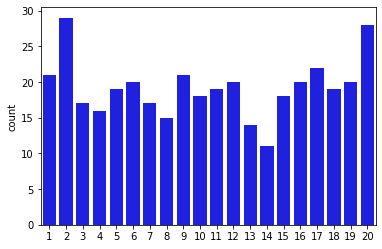

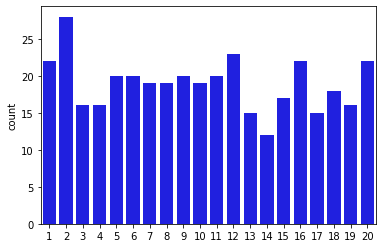

In [8]:
order_appear = results.loc[:, results.columns[1::3]].values[1:].reshape(-1)
first_recall = results.loc[:, results.columns[2::3]].values[1:].reshape(-1)
second_recall = results.loc[:, results.columns[3::3]].values[1:].reshape(-1)

na_mask = np.vectorize(pd.isna)

first_recalled = order_appear[~na_mask(first_recall)].astype(int)
second_recalled = order_appear[~na_mask(second_recall)].astype(int)

sns.countplot(first_recalled, color='blue')
plt.show()
sns.countplot(second_recalled, color='blue')
plt.show()

### 5. Regarder si certains objets sont plus cités que d'autres

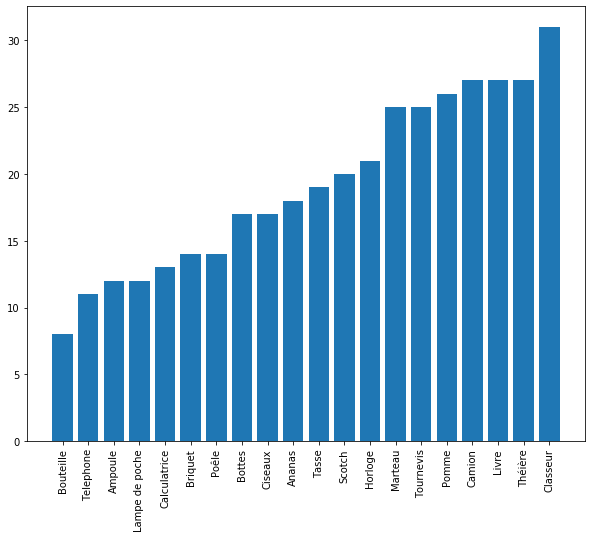

In [9]:
object_apperance = results.loc[1:, results.columns[2::3]].T
object_apperance.columns = results.loc[1:, results.columns[0]]
object_apperance = (~object_apperance.isnull()).sum()

values = list(zip(object_apperance.index, object_apperance.values))
values = list(sorted(values, key=lambda x: x[1]))
items = [value[0] for value in values]
counts = [value[1] for value in values]

plt.figure(figsize=(10,8))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.show()

### 6. Si assez de femme, on peut regarder s'il y a une différence entre les genres...
ça part

### 7. Regarder objets (par exemple pomme) sont plus rappelés pendant la forêt ou le désert

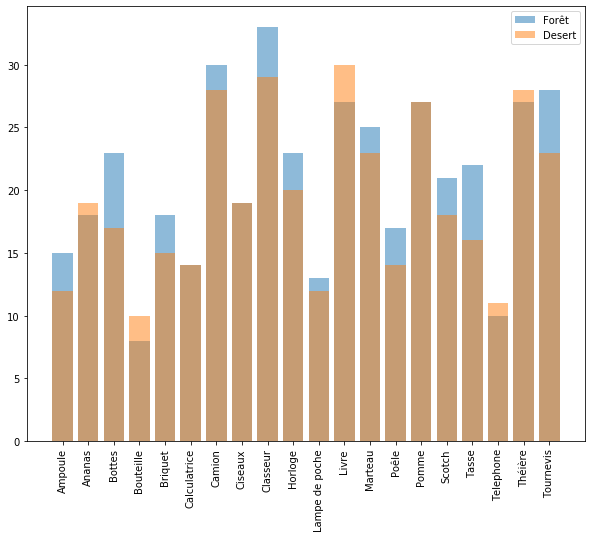

In [10]:
plt.figure(figsize=(10,8))

for env in ['A', 'B']:
    df = results.loc[1:, filter(lambda c: env in c, results.columns)]
    df.reset_index(inplace=True)
    df.index = results[results.columns[0]][1:]
    df = (~df.T.isnull()).sum()
     
    label = "Forêt" if env == 'A' else 'Desert'
    
    plt.bar(df.index, df.values, alpha=0.5, label=label)

plt.legend()
plt.xticks(rotation=90)
plt.show()

### 8. Regarder si les gens se rappellent de certaines catégories (par exemple tous les outils, tous les ustensiles, couleur, charactéristique commune), ou alors si tous les outils sont dits ensemble lors des rappels, etc...

In [11]:
results.loc[:, results.columns[0]].values

array([nan, 'Ampoule', 'Ananas', 'Bottes', 'Bouteille', 'Briquet',
       'Calculatrice', 'Camion', 'Ciseaux', 'Classeur', 'Horloge',
       'Lampe de poche', 'Livre', 'Marteau', 'Poêle', 'Pomme', 'Scotch',
       'Tasse', 'Telephone', 'Théière', 'Tournevis'], dtype=object)

In [12]:
groups = {
    'outils': ['Tournevis', 'Marteau'],
    'cuisine': ['Théière', 'Poêle', 'Tasse'],
    'fruits': ['Pomme', 'Ananas'],
    'école': ['Scotch', 'Classeur', 'Calculatrice', 'Ciseaux', 'Livre'],
    'ménager': ['Horloge', 'Ampoule'],
    'lumière': ['Briquet', 'Ampoule', 'Lampe de poche']
}

In [13]:
for group in groups.keys():
    print(group)
    first_recall = results.loc[1:, results.columns[2::3]].T
    first_recall.columns = results.loc[1:, results.columns[0]]
    first_recall = first_recall.loc[:, groups[group]]
    
    display(first_recall)

outils


Unnamed: 0.1,Tournevis,Marteau
A,4,NaN
A.2,8,4
B.1,6,7
B.3,2,NaN
B.4,NaN,1
B.6,11,1
A.5,6,3
B.8,2,NaN
A.6,NaN,NaN
A.8,7,9


cuisine


Unnamed: 0.1,Théière,Poêle,Tasse
A,NaN,12,NaN
A.2,9,3,NaN
B.1,5,3,NaN
B.3,1,NaN,NaN
B.4,6,4,NaN
B.6,6,NaN,2
A.5,1,NaN,9
B.8,NaN,NaN,6
A.6,9,NaN,11
A.8,NaN,NaN,1


fruits


Unnamed: 0.1,Pomme,Ananas
A,3,13
A.2,6,NaN
B.1,2,1
B.3,8,7
B.4,5,NaN
B.6,7,8
A.5,4,NaN
B.8,1,NaN
A.6,1,NaN
A.8,NaN,6


école


Unnamed: 0.1,Scotch,Classeur,Calculatrice,Ciseaux,Livre
A,6,11,9,1,10
A.2,NaN,7,NaN,NaN,2
B.1,NaN,NaN,NaN,NaN,NaN
B.3,4,6,NaN,9,5
B.4,NaN,8,NaN,7,9
B.6,13,5,12,9,4
A.5,NaN,2,13,NaN,NaN
B.8,NaN,3,NaN,NaN,4
A.6,6,NaN,NaN,4,2
A.8,NaN,5,NaN,NaN,10


ménager


Unnamed: 0.1,Horloge,Ampoule
A,5,NaN
A.2,NaN,5
B.1,NaN,NaN
B.3,NaN,NaN
B.4,3,NaN
B.6,3,10
A.5,8,11
B.8,NaN,NaN
A.6,10,7
A.8,8,3


lumière


Unnamed: 0.1,Briquet,Ampoule,Lampe de poche
A,NaN,NaN,NaN
A.2,NaN,5,NaN
B.1,NaN,NaN,NaN
B.3,NaN,NaN,NaN
B.4,NaN,NaN,NaN
B.6,14,10,NaN
A.5,NaN,11,12
B.8,NaN,NaN,7
A.6,NaN,7,8
A.8,NaN,3,4
